In [23]:
import math
from collections import Counter
import matplotlib.pyplot as plt
import random
import numpy as np

In [19]:
def normal_cdf(x,mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2
def inverse_normal_cdf(p,mu=0,sigma=1,tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p,tolerance=tolerance)
    low_z,low_p = -10.0,1
    hi_z,hi_p = 10.0,1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z,low_p = mid_z,mid_p
        elif mid_p > p:
            hi_z,hi_p = mid_z,mid_p
        else:
            break
    return mid_z
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]
def dot(v,w):
    return sum(v_i * w_i for v_i,w_i in zip(v,w))
def mean(x):
    return sum(x) / len(x)
def standard_deviation(x):
    return math.sqrt(variance(x))
def sum_of_squares(v):
    return dot(v,v)
def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)
def covariance(x,y):
    n = len(x)
    return dot(de_mean(x),de_mean(y)) / (n - 1)
def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y) / stdev_x / stdev_y
    else:
        return 0

In [15]:
def bucketize(point,bucket_size):
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points,bucket_size):
    return Counter(bucketize(point,bucket_size) for point in points)

def plot_histogram(points,bucket_size,title=""):
    histogram = make_histogram(points,bucket_size)
    plt.bar(histogram.keys(),histogram.values(),width=bucket_size)
    plt.title(title)
    plt.show()

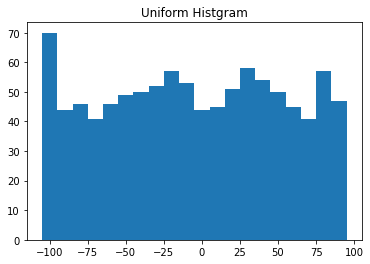

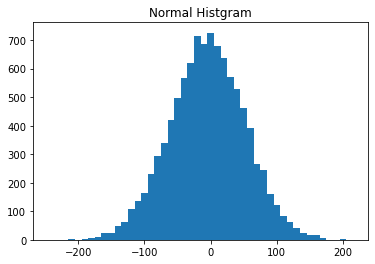

In [16]:
random.seed(0)

uniform = [200 * random.random() - 100 for _ in range(1000)]

normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

plot_histogram(uniform,10,"Uniform Histgram")

plot_histogram(normal,10,"Normal Histgram")

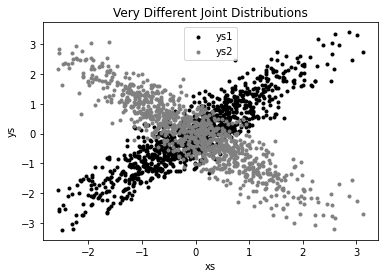

In [17]:
def random_normal():
    return inverse_normal_cdf(random.random())
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]
plt.scatter(xs,ys1,marker='.',color='black',label='ys1')
plt.scatter(xs,ys2,marker='.',color='gray',label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [20]:
print(correlation(xs,ys1))
print(correlation(xs,ys2))


0.8969745688442448
-0.8917556057425695


In [21]:
def correlation_matrix(data):
    _,num_colimns = shape(data)
    def matrix_entry(i,j):
        return correlation(get_column(data,i),get_colmn(data,j))
    return make_matrix(num_columns,num_colmuns,matrix_entry)

In [24]:
_,num_columns = np.shape(data)
fig,ax = plt.subplots(num_columns,num_columns)

for i in range(num_columns):
    for j in range(num_columns):
        if i != j: ax[i][j].scatter(get_column(data,j),get_column(data,i))
        else: ax[i][j].annotate("series " + str(i),(0.5,0.5),xycords='axes function',ha='center',va='center')
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim)
plt.show()

NameError: name 'data' is not defined